<h1>This is my second benchmark, I am using the previous months average to predict the next month sales, also pretty simple concept for benchmarking<h1>

In [94]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv.gz', 'sample_submission.csv.gz', 'items.csv', 'item_categories.csv', 'shops.csv', 'sales_train.csv.gz']


In [95]:
DATA_FOLDER = '../input'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))
test            = pd.read_csv(os.path.join(DATA_FOLDER, 'test.csv.gz'))

here we calculate an average of the [shop_id, item_id] -> sales prediction ***averaged*** on every single months in the dataset

In [107]:
transactions_by_month = transactions[transactions.date_block_num > 31].groupby(["date_block_num","item_id","shop_id"], as_index=False).item_cnt_day.sum().rename(columns={"item_cnt_day": "item_cnt_month"})

In [108]:
averaged_item_cnt_month = transactions_by_month.groupby(["item_id","shop_id"], as_index=False).item_cnt_month.mean()

In [109]:
averaged_item_cnt_month = test.merge(averaged_item_cnt_month, on = ["shop_id", "item_id"], how="left")[["ID","item_cnt_month"]]
averaged_item_cnt_month["item_cnt_month"] = averaged_item_cnt_month.item_cnt_month.fillna(0).clip(0, 20)

here we calculated only the last month benchmark for the [shop_id, item_id] -> sales prediction

In [99]:
prev_month = transactions[transactions.date_block_num == 33]

In [100]:
prev_month_benchmark = prev_month.groupby(["item_id","shop_id"], as_index=False).item_cnt_day.sum()

In [101]:
item_cnt_prev_month = test.merge(prev_month_benchmark, on = ["shop_id", "item_id"], how="left")[["ID","item_cnt_day"]]
item_cnt_prev_month["item_cnt_day"] = item_cnt_prev_month.item_cnt_day.fillna(0).clip(0, 20)

now is interesting to analyse the difference between the two:

In [102]:
 item_cnt_prev_month.head()

,ID,item_cnt_day
0,0,0.0
1,1,0.0
2,2,1.0
3,3,0.0
4,4,0.0


In [103]:
averaged_item_cnt_month.head()

,ID,item_cnt_month
0,0,1.444444
1,1,0.000000
2,2,2.000000
3,3,1.000000
4,4,0.000000


interestingly enough, in the second prediction dataset we have way more predictions (check the ID columns):
in the histogram below you see in orange the previous month prediction and in blue the averaged predictions

<BarContainer object of 40 artists>

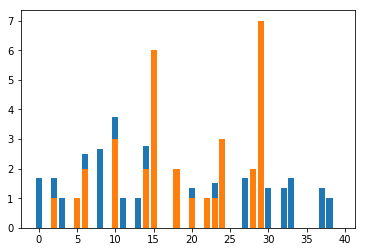

In [110]:
plt.bar(averaged_item_cnt_month.head(40)["ID"],averaged_item_cnt_month.head(40)["item_cnt_month"])
plt.bar(item_cnt_prev_month.head(40)["ID"],item_cnt_prev_month.head(40)["item_cnt_day"])


In [106]:
averaged_item_cnt_month.to_csv("second_benchmark_submission.csv", index=False)

***this second benchmark scores lower than the first benchmark***